In [ ]:
#Whatsapp Message Exploratory Data Analysis(EDA)Project
!pip install jovian --upgrade --quiet
!pip install numpy --upgrade --quiet
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet
!pip install wordcloud --upgrade --quiet
!pip install emoji  --upgrade --quiet
!pip install plotly_express --upgrade --quiet

In [ ]:
project_name = "whatsapp-chat-analysis-course-project"


In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name,enviroment=None,files=["Chat.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [ ]:
import plotly.express as px
import os
import pandas as pd
import re
import datetime as time
import jovian
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import emoji
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [ ]:
whatsapp_df = pd.read_fwf('Chat.txt', header = None)

whatsapp_df

,0,1,2
0,"05/02/2020,",10:00 am - Messages to this group are now secu...,info.
1,"05/02/2020,","10:00 am - You created group ""Exam group REI """,NaN
2,"05/02/2020,",10:00 am - Ed: Come come @60183560200 @6019777...,NaN
3,"05/02/2020,",10:00 am - Ed: We share our knowledge here and...,NaN
4,"05/02/2020,",10:01 am - Ed: <Media omitted>,NaN
...,...,...,...
23325,"21/09/2020,",2:26 pm - Rohit: onz onz,NaN
23326,"21/09/2020,",2:26 pm - Ed: This is what I call English song...,NaN
23327,"21/09/2020,",2:26 pm - Ed: Days*,NaN
23328,NaN,NaN,NaN


In [ ]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23330 entries, 0 to 23329
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       23177 non-null  object
 1   1       23087 non-null  object
 2   2       788 non-null    object
dtypes: object(3)
memory usage: 546.9+ KB


In [ ]:
whatsapp_df.shape

(23330, 3)

In [ ]:
def txtTodf(txt_file):
    '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
    # some regex to account for messages taking up multiple lines
    pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

    user     = []; 
    message  = []; 
    datetime = []
    
    for row in data:

        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])

        # sender is between am/pm, dash and colon
        try:
            s = re.search('m - (.*?):', row).group(1)
            user.append(s)
        except:
            user.append('')

        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
    df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %I:%M %p')

    # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)
    
    return df

whatsapp_df = txtTodf('Chat.txt')

In [ ]:
whatsapp_df.head(10)

,datetime,user,message
0,2020-02-05 10:00:00,Ed,Come come @60183560200 @60197773622 🤣🤣🤣
1,2020-02-05 10:00:00,Ed,We share our knowledge here and pass year
2,2020-02-05 10:01:00,Ed,<Media omitted>
3,2020-02-05 10:01:00,Ed,Easy to communicate 🤣🤣🤣
4,2020-02-05 10:01:00,Rohit,💪🏾
5,2020-02-05 10:01:00,Rohit,yea
6,2020-02-05 12:22:00,Ed,<Media omitted>
7,2020-02-05 12:22:00,Ed,Guys? Haha
8,2020-02-05 12:38:00,Ed,You deleted this message
9,2020-02-05 12:38:00,Ed,One of the answer


In [ ]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  22701 non-null  datetime64[ns]
 1   user      22701 non-null  object        
 2   message   22701 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 532.2+ KB


In [ ]:
jovian.commit(project=project_name,enviroment=None,files=["Chat.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [ ]:
# To understand the number od the image data
img = whatsapp_df[whatsapp_df['message'] == "<Media omitted>" ]
img.shape


(1182, 3)

In [ ]:
# We will drop all the image file by using the Drop functions
whatsapp_df.drop(img.index, inplace=True)

In [ ]:
whatsapp_df.head(10)

,datetime,user,message
0,2020-02-05 10:00:00,Ed,Come come @60183560200 @60197773622 🤣🤣🤣
1,2020-02-05 10:00:00,Ed,We share our knowledge here and pass year
3,2020-02-05 10:01:00,Ed,Easy to communicate 🤣🤣🤣
4,2020-02-05 10:01:00,Rohit,💪🏾
5,2020-02-05 10:01:00,Rohit,yea
7,2020-02-05 12:22:00,Ed,Guys? Haha
8,2020-02-05 12:38:00,Ed,You deleted this message
9,2020-02-05 12:38:00,Ed,One of the answer
13,2020-02-05 12:39:00,Rohit,"My recursive, I studying sorting now and i wil..."
14,2020-02-05 12:39:00,Rohit,And send here also


In [ ]:
whatsapp_df.reset_index(inplace=True, drop=True)
whatsapp_df.shape

(21519, 3)

# Answer the below questions:
1. Which users have the most Chat/messages in the group?
2. Which emojis use the most by which users?
3. Most active hours?
4. Which month have the highest messages and also the busiest month?
5. Determine which word or text did the user use the most?



In [ ]:
jovian.commit(project=project_name,enviroment=None,files=["Chat.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


# 1. Which users have the most Chat/messages in the group?

In [ ]:
#Understand how many user and messages in this chat first
totalNumberofMessage = whatsapp_df.message.count()
username   = whatsapp_df["user"].unique() #unique is a functions that able find the unique elements of an array

print('The total of the number of message:',totalNumberofMessage)
print('User name that involve in the chat:',username)

The total of the number of message: 21519
User name that involve in the chat: ['Ed' 'Rohit' 'Pei Yin']


In [ ]:
#Creating a new dataframe by copying the old dataframe
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1['Number_of_messages'] = [1]* whatsapp_df1.shape[0]
whatsapp_df1.drop(columns = 'datetime', inplace = True)

#We are groupby the user and messages together then we will use count() to count the messages for each of user
whatsapp_df1 = whatsapp_df1.groupby('user')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
whatsapp_df1

,user,Number_of_messages
0,Rohit,10268
1,Ed,6991
2,Pei Yin,4260


# 2.Which emojis use the most by which users?

In [ ]:
#Copy a dataset
whatsapp_df2 = whatsapp_df.copy()

#Count the number of emoji
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys()) #UNICODE_EMOJI class have a thee emoji code inside
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["message"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1
    
    
   

In [ ]:
#This will help to create or rendered the emoji 
emojis_df = pd.DataFrame() #The reason to use pd.dataframe is we want to put the emojis_df into the dataframe tables
emojis_df['emoji'] = [''] * 10
emojis_df['number_of_Emoji'] = [0] * 10

i = 0
for item in emoji_ctr.most_common(10):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
  
    i += 1

emojis_df

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,emoji,number_of_Emoji
0,😂,1904
1,🤣,253
2,💪,34
3,🏼,33
4,😍,31
5,😔,31
6,😭,29
7,🙏,28
8,❤,27
9,😢,20


In [ ]:
#Now we want to know which emoji is use the most by each of the users. But since the first results only create 
#emoji and number_emoji in the dataframe now we need to create a dataframe contain user and emojio they use
whatsapp_df2.head()

emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

In [ ]:
emojis_df = whatsapp_df2

emojis_df['emoji'] = [''] * 21519
emojis_df['number_of_Emoji'] = [0] * 21519

i = 0
for item in emoji_ctr.most_common(21519):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
  
    i += 1

emojis_df

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datetime,user,message,emoji,number_of_Emoji
0,2020-02-05 10:00:00,Ed,Come come @60183560200 @60197773622 🤣🤣🤣,😂,1904
1,2020-02-05 10:00:00,Ed,We share our knowledge here and pass year,🤣,253
2,2020-02-05 10:01:00,Ed,Easy to communicate 🤣🤣🤣,💪,34
3,2020-02-05 10:01:00,Rohit,💪🏾,🏼,33
4,2020-02-05 10:01:00,Rohit,yea,😍,31
...,...,...,...,...,...
21514,2020-09-20 17:32:00,Ed,who have finish math lecture ?,,0
21515,2020-09-21 14:25:00,Ed,You deleted this message,,0
21516,2020-09-21 14:26:00,Rohit,onz onz,,0
21517,2020-09-21 14:26:00,Ed,This is what I call English song. Good old fays,,0


# 3. Most active hour in whatsapps

In [ ]:
#Copy a dataframe
whatsapp_df3 = whatsapp_df.copy()

whatsapp_df3['number_of_message'] = [1] * whatsapp_df3.shape[0]

whatsapp_df3['hours'] = whatsapp_df3['datetime'].apply(lambda x: x.hour)

time_df = whatsapp_df3.groupby('hours').count().reset_index().sort_values(by = 'hours')


time_df




,hours,datetime,user,message,number_of_message
0,0,632,632,632,632
1,1,331,331,331,331
2,2,233,233,233,233
3,3,18,18,18,18
4,4,1,1,1,1
5,8,135,135,135,135
6,9,402,402,402,402
7,10,1027,1027,1027,1027
8,11,1360,1360,1360,1360
9,12,2169,2169,2169,2169


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Most active hour in whatsapps'}, xlabel='hours', ylabel='number_of_message'>

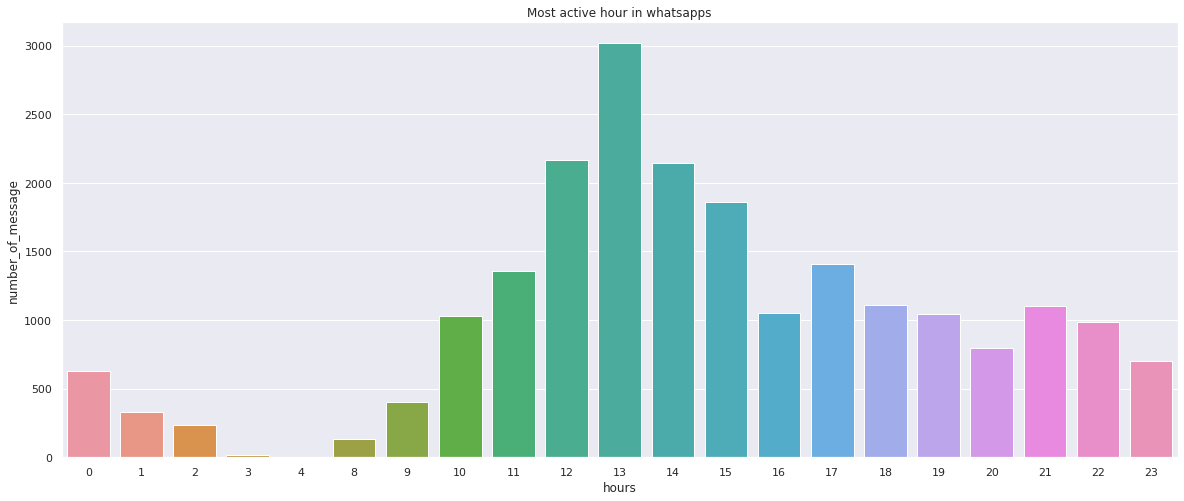

In [ ]:
#Create the formatting of the graph 
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)


# Using the seaborn style 
sns.set_style("darkgrid")

plt.title('Most active hour in whatsapps');
sns.barplot(time_df.hours,time_df.number_of_message,data = time_df,dodge=False)






# 4. Which month have the highest messages and also the busiest month?


In [ ]:
whatsapp_df4 = whatsapp_df.copy()
whatsapp_df4['Number_of_messages'] = [1] * whatsapp_df4.shape[0]

whatsapp_df4['month'] = whatsapp_df4['datetime'].apply(lambda x: x.month)  

df_month = whatsapp_df4.groupby('month')['Number_of_messages'].count().sort_values(ascending = False).reset_index()
df_month.head()

,month,Number_of_messages
0,7,7198
1,8,5225
2,9,3642
3,6,2796
4,4,1352


Text(0.5, 1.0, 'Month that have the highest messages and the busiest month?')

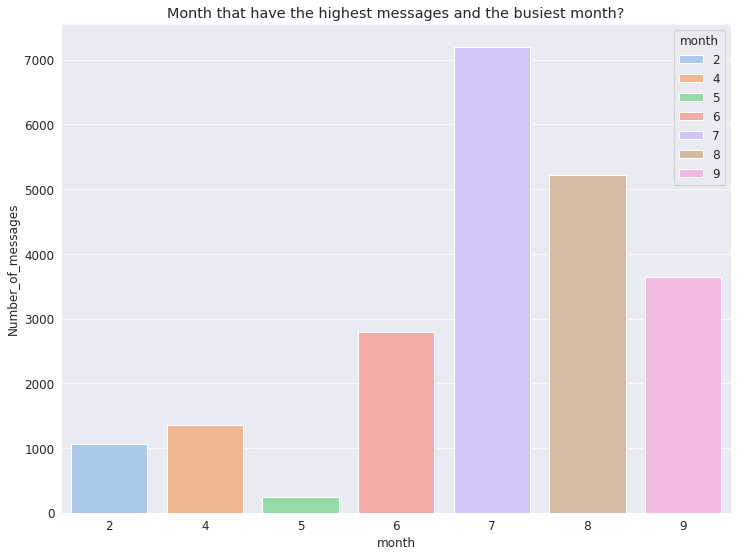

In [ ]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(x=df_month.month,y=df_month.Number_of_messages ,hue='month',data=df_month,dodge=False,palette="pastel")
plt.title("Month that have the highest messages and the busiest month?")

# 5.Determine which word or text did the user use the most?

In [ ]:
whatsapp_df5 = whatsapp_df.copy()


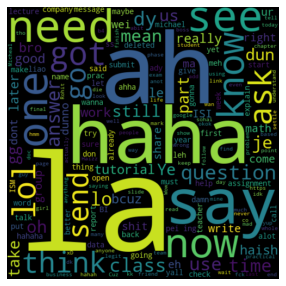

In [ ]:
#Each of the word in the message will be review
word = " ".join(review for review in whatsapp_df5.message)

stopwords = set(STOPWORDS)

#delete the word/text that are commonly used(eg.the,yes,no,bye,or and is)
stopwords.update(["the","is","yea","ok","okay","or","bye","no","will","yeah","I","almost","if","me","you","done","want","Ya"])

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 ,stopwords=stopwords, background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




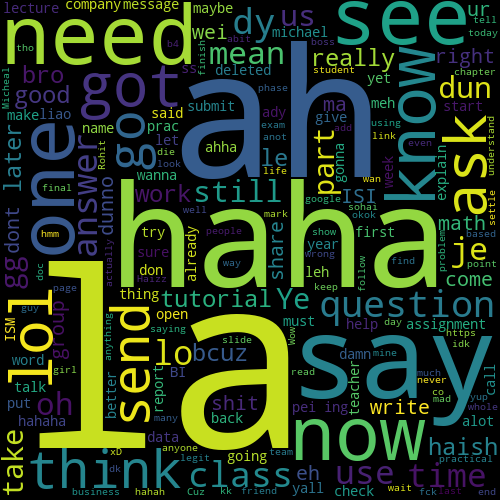

In [ ]:
wordcloud.to_image()

In [ ]:
jovian.commit(project=project_name,enviroment=None,files=["Chat.txt"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "edsenmichaelcy/whatsapp-chat-analysis-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/edsenmichaelcy/whatsapp-chat-analysis-course-project


'https://jovian.ml/edsenmichaelcy/whatsapp-chat-analysis-course-project'